## Task 1

1. Train 4 different classifiers using _sklearn_ library to predict _"Activity"_ (biological response of the molecule) 
    field from the [_"bioresponse.csv"_](./bioresponse.csv) dataset:
    - [small decision tree](#Small-decision-tree);
    - [deep decision tree](#Deep-decision-tree);
    - [random forest on small trees](#Random-forest-on-small-trees);
    - [random forest on deep trees](#Random-forest-on-deep-trees).
    

In [1]:
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score, recall_score, accuracy_score, f1_score, log_loss, precision_recall_curve, roc_curve, roc_auc_score
)
from matplotlib import pyplot as plt

In [2]:
def show_metrics(descr, res_test, res_pred, proba):
    print(descr)
    print("precision = {p:.3f}; recall = {r:.3f}; accuracy = {a:.3f}; f1 = {f:.3f}; log_loss = {ll:.3f}".format(
        p=precision_score(res_test, res_pred), r=recall_score(res_test, res_pred),
        a=accuracy_score(res_test, res_pred), f=f1_score(res_test, res_pred),
        ll=log_loss(res_test, res_pred)
    ))

    fig, (ax_pr, ax_roc) = plt.subplots(1, 2, figsize=(15, 5))

    precision, recall, threshold = precision_recall_curve(res_test, proba)
    fpr, tpr, thr = roc_curve(res_test, proba)

    ax_pr.plot(threshold, precision[:-1], label="precision")
    ax_pr.plot(threshold, recall[:-1], label="recall")
    ax_pr.set_xlabel("threshold")
    ax_pr.set_title("precision-recall curve")
    ax_pr.legend()
    ax_pr.grid()

    plt.plot(fpr, tpr, label=descr)
    ax_roc.set_xlabel("false positive rate")
    ax_roc.set_ylabel("true positive rate")
    ax_roc.set_title("ROC curve")
    ax_roc.legend(loc=4)
    ax_roc.grid()

In [3]:
bio_df = pandas.read_csv("./bioresponse.csv")
bio_df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_vec = bio_df.loc[:, "D1":"D1776"]
y_vec = bio_df["Activity"]

x_train, x_test, y_train, y_test = train_test_split(x_vec, y_vec, test_size=0.3, random_state=777)

### Small decision tree

Small decision tree
precision = 0.779; recall = 0.831; accuracy = 0.772; f1 = 0.804; log_loss = 7.883


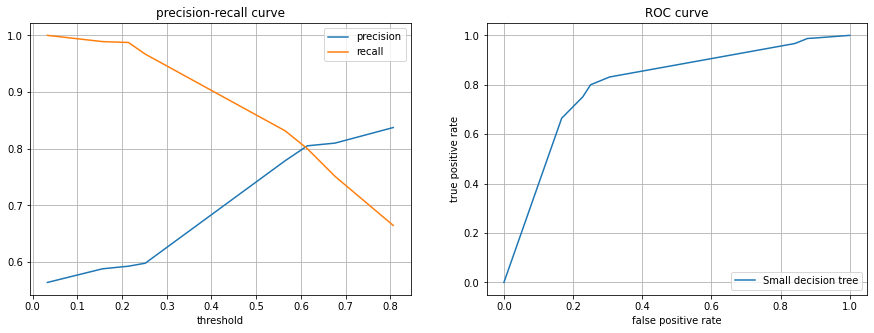

In [5]:
s_dec_tree = DecisionTreeClassifier(max_depth=3, random_state=777)
s_dec_tree = s_dec_tree.fit(x_train, y_train)

show_metrics(
    "Small decision tree", y_test,
    s_dec_tree.predict(x_test),
    s_dec_tree.predict_proba(x_test)[:, 1]
)

### Deep decision tree

Deep decision tree
precision = 0.798; recall = 0.729; accuracy = 0.743; f1 = 0.762; log_loss = 8.865


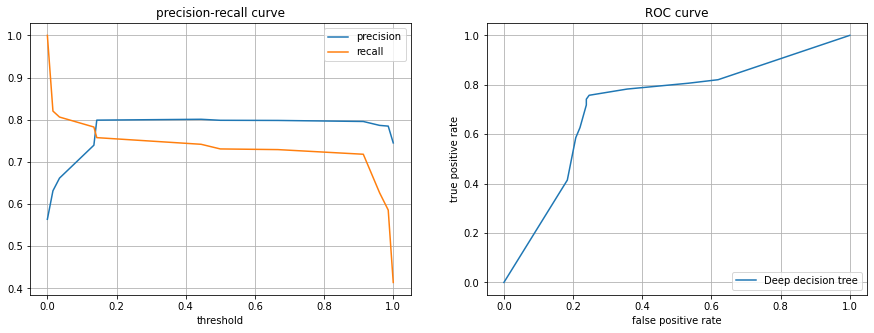

In [6]:
d_dec_tree = DecisionTreeClassifier(max_depth=18, random_state=777)
d_dec_tree = d_dec_tree.fit(x_train, y_train)

show_metrics(
    "Deep decision tree", y_test,
    d_dec_tree.predict(x_test),
    d_dec_tree.predict_proba(x_test)[:, 1]
)

### Random forest on small trees

Random forest on small trees
precision = 0.766; recall = 0.751; accuracy = 0.730; f1 = 0.758; log_loss = 9.325


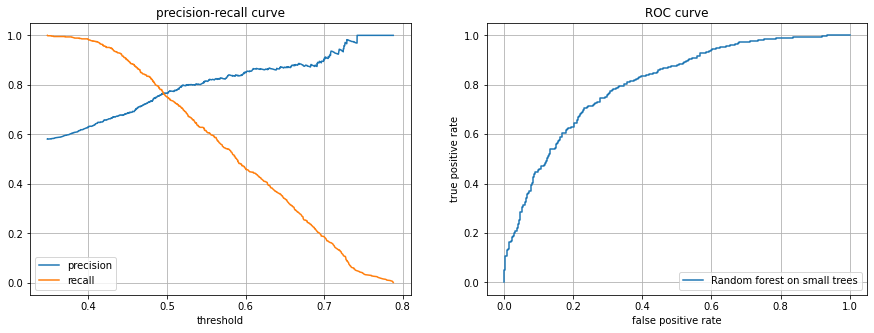

In [7]:
rs_forest = RandomForestClassifier(max_depth=3, random_state=777)
rs_forest = rs_forest.fit(x_train, y_train)

show_metrics(
    "Random forest on small trees", y_test,
    rs_forest.predict(x_test),
    rs_forest.predict_proba(x_test)[:, 1]
)

### Random forest on deep trees

Random forest on deep trees
precision = 0.817; recall = 0.808; accuracy = 0.790; f1 = 0.812; log_loss = 7.270


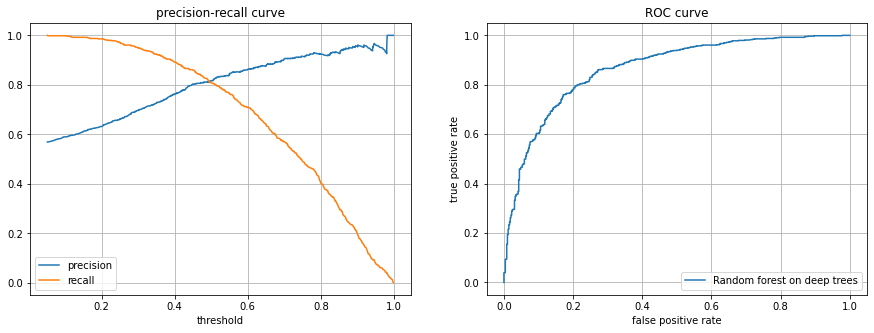

In [8]:
rd_forest = RandomForestClassifier(max_depth=18, random_state=777)
rd_forest = rd_forest.fit(x_train, y_train)

show_metrics(
    "Random forest on deep trees", y_test,
    rd_forest.predict(x_test),
    rd_forest.predict_proba(x_test)[:, 1]
)